FINAL PROJECT 4: K-MEANS

# Perkenalan

1. Latar belakang memilih kasus. Segmentasi kartu kredit penting dilakukan oleh lembaga keuangan untuuk mengkategorikan pemegang kartu kredit ke dalam kelompok-kelompok tertentu berdasarkan kriteria perilaku penggunaan kreditnya. Pembuatan model klasifikasi pengguna kartu kredit digunakan untuk promosi produk sesuai dengan segmen pelanggan tertentu. Selain itu segmentasi pengguna kartu kredit juga digunakan untuk analisis resiko untuk memastikan praktik pemberian pinjaman berjalan dengan lancar berdasarkan informasi batas kredit.
2. Data yang digunakan
Data ini berisi transaksi pengguna kartu kredit sebanyak 8950 orang selama 6 dengan 18 atribut
3. Objective yang akan dicapai: model klasifikasi kelas kredit menggunakan algoritma Decision Tree berdasarkan pola perilaku yang tersedia dalam data

# Import Pustaka yang Dibutuhkan

In [75]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

# Data Loading

In [76]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL (1).csv


In [77]:
import pandas as pd
df=pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [78]:
# mengecek ukuran data
df.shape

(8950, 18)

In [79]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [80]:
# mengecek data kolom
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [81]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

In [82]:
# mencari missing values
df.isnull().values.any()

True

In [83]:
# mencari jumlah missing values
df.isnull().values.sum()

314

In [84]:
df.columns[df.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

In [85]:
#filling the missing value

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [86]:
# jumlah missing values setelah missing values ditangani
len(df.columns[df.isnull().any()])

0

In [87]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Identifikasi tipe kolom

In [88]:
# Identify number of columns by type
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 17
Discrete features Count 1
Continuous features Count 16
Categorical features Count 1
Binary Categorical features Count 0


In [89]:
df=df.drop(['CUST_ID'], axis=1)

# Eksplorasi Data


- Rata-rata credit limit



In [90]:
# mencari rata-rata credit limit
mean_credit_limit=np.mean(df['CREDIT_LIMIT'])
mean_credit_limit

4494.449450364621

Jumlah rata-rata kredit limit masing-masing pengguna kartu kredit adalah sebesar 4494,45

- Median minimum payment

In [91]:
median_min_payment=np.median(df['MINIMUM_PAYMENTS'])
median_min_payment

335.6283125

Median dari minimum payment pengguna kartu kredit sebesar 335,63

- Modus tenure pengguna kartu kredit

In [92]:
modus_tenure=stats.mode(df['TENURE'])
modus_tenure


ModeResult(mode=array([12]), count=array([7584]))

Tenure yang banyak digunakan oleh penggua kredit adalah tenure dengan nilai 12 dengan banyak pengguna yang menggunakan tenure ini sebesar 7584 pengguna

- Range one off purchase (jumlah pembelian maksimum yang dilakukan dalam sekali jalan)

In [93]:
# menentukan nilai tertinggi dan terendah
oneoff_purchase_max=pd.Series(df['ONEOFF_PURCHASES']).max()
oneoff_purchase_min=pd.Series(df['ONEOFF_PURCHASES']).min()
oneoff_purchase_max, oneoff_purchase_min

(40761.25, 0.0)

In [94]:
oneoff_purchase_range=oneoff_purchase_max - oneoff_purchase_min
oneoff_purchase_range

40761.25

Range dari jumlah pembelian maksimum yang dilakukan dalam sekali jalan adalah 40761.25

- Variasi balance

In [95]:
balance_var=np.var(df['BALANCE'])
balance_var

4332290.856259278

Variabel balance memiliki variasi yang besar yaitu 4332290.86 yang menunjukkan balance pada masing-masing pengguna kartu kredit sangat heterogen

- Standar deviasi pada variabel cash advance trx

In [96]:
cash_advance_trx_stdev=np.std(df['CASH_ADVANCE_TRX'])
cash_advance_trx_stdev

6.824265468334133

Standar deviasi 6,82 menunjukkan bahwa ada variasi yang cukup besar dalam jumlah transaksi  dari cash in advance yang dilakukan oleh pengguna kartu kredit

- Mencari berapa banyak data yang memiliki nilai balance frequency = 1

---



In [97]:
df['BALANCE_FREQUENCY']

0       0.818182
1       0.909091
2       1.000000
3       0.636364
4       1.000000
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.833333
8949    0.666667
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64

In [98]:
# Query data dengan balance frequency=1
query=df.query("BALANCE_FREQUENCY == 1")
query.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12
4,817.714335,1.0,16.00,16.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12
6,627.260806,1.0,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.0,12
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12


Sebanyak 6211 memiliki balance frequency=1 yang menunjukkan bahwa sebagian besar pemegang kredit sering memperbarui saldo kreditnya

- Grouping data rata-rata purchase berdasarkan tenure

In [99]:
# Grouping rata-rata purchases berdasarkan tenure
grouped_data = df.groupby('TENURE')['PURCHASES'].mean()
grouped_data

TENURE
6      443.941667
7      424.559421
8      468.858929
9      540.138171
10     676.631271
11     571.222411
12    1088.192402
Name: PURCHASES, dtype: float64

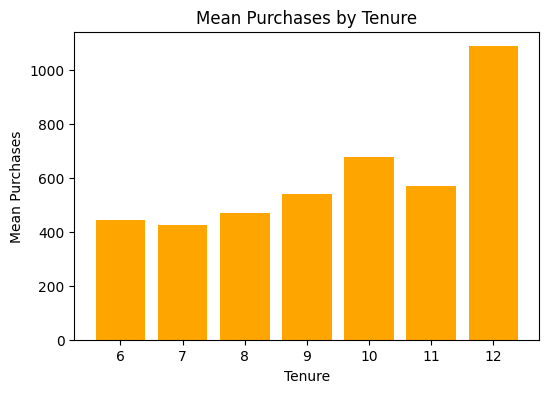

In [100]:
# Mengambil data tenure dan rata-rata purchases
tenure = grouped_data.index
mean_purchases = grouped_data.values

# Membuat bar plot
plt.figure(figsize=(6, 4))  # Mengatur ukuran gambar
plt.bar(tenure, mean_purchases, color='orange')
plt.xlabel('Tenure')
plt.ylabel('Mean Purchases')
plt.title('Mean Purchases by Tenure')
plt.show()

Dari data tersebut, rata-rata purchase terendah ada di tenure 7 dan rata-rata purchase tertinggi ada di tenure 12

Visualisasi Data

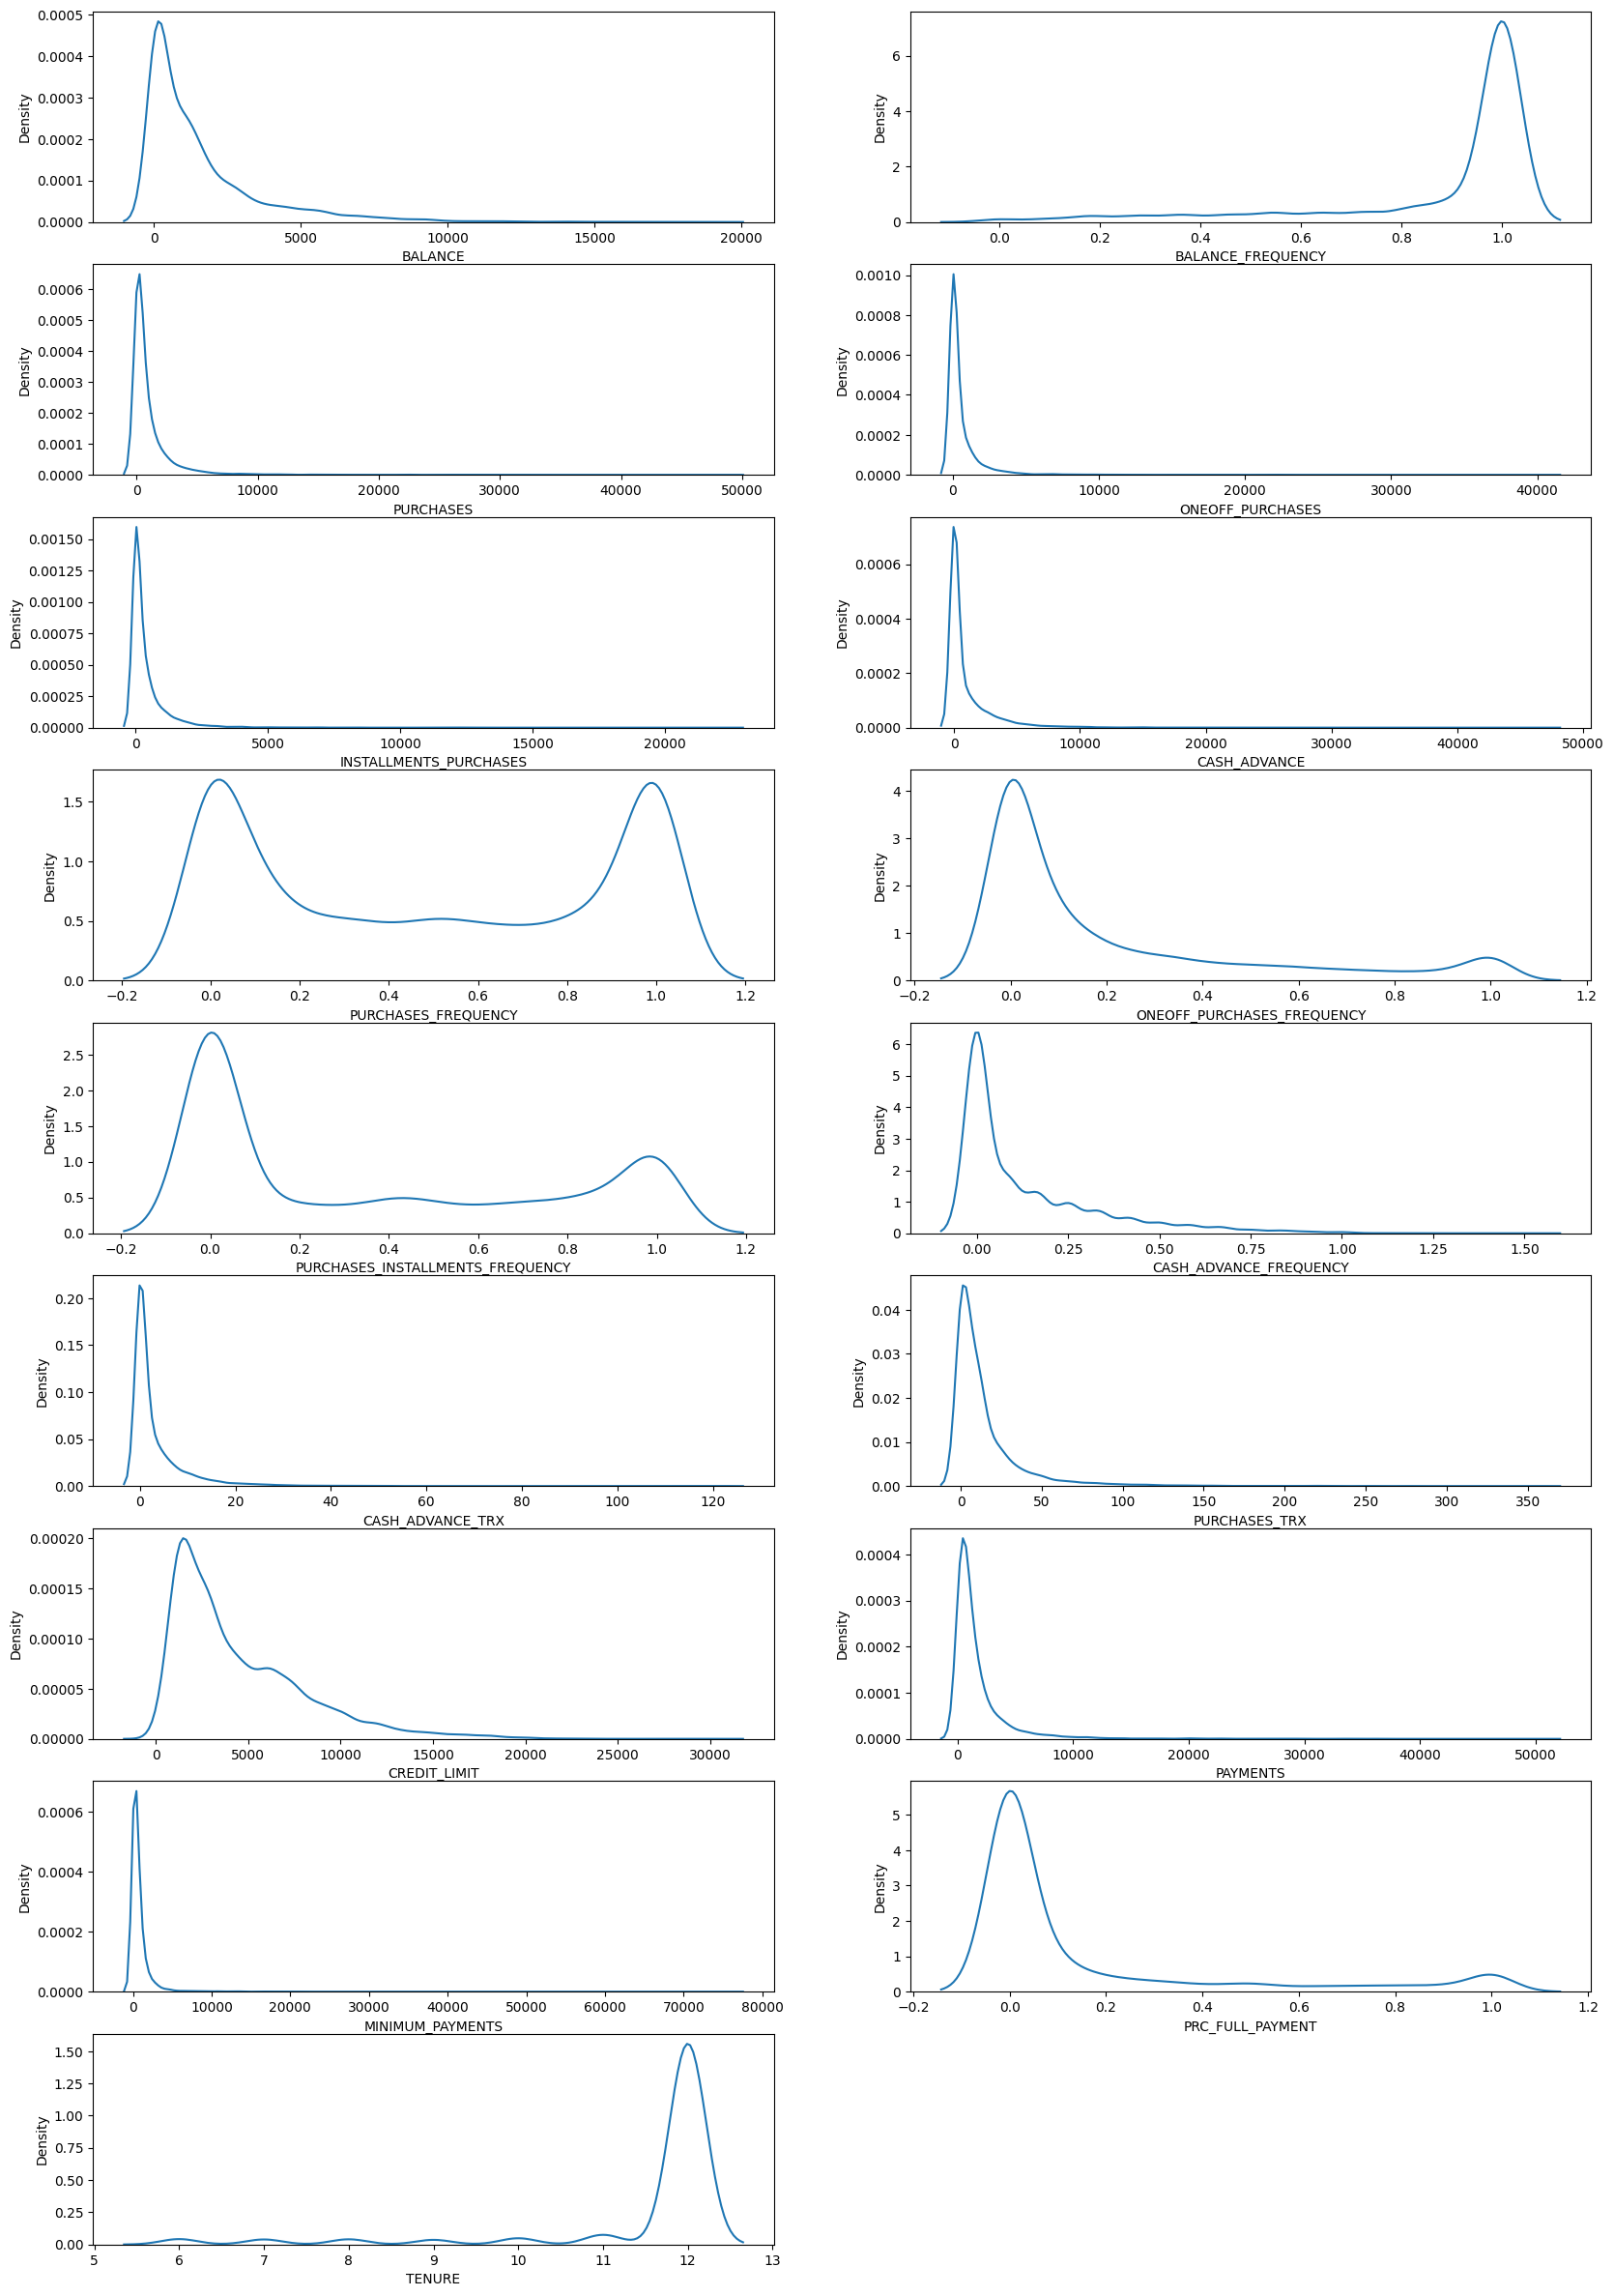

In [101]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

Hampir seluruh variabel  emiliki bentuk kurva yang miring ke kanan atau ke kiri . Hal ini menunjukkan kemungkinan adanya outlier. Ini mungkin terjadi karena ada sebagian kecil orang yang memiliki jumlah uang dan batas kredit yang sangat tinggi, sedangkan sebagian besar orang memiliki jumlah uang dan batas kredit yang kurang lebih sama.

Korelasi

<Axes: >

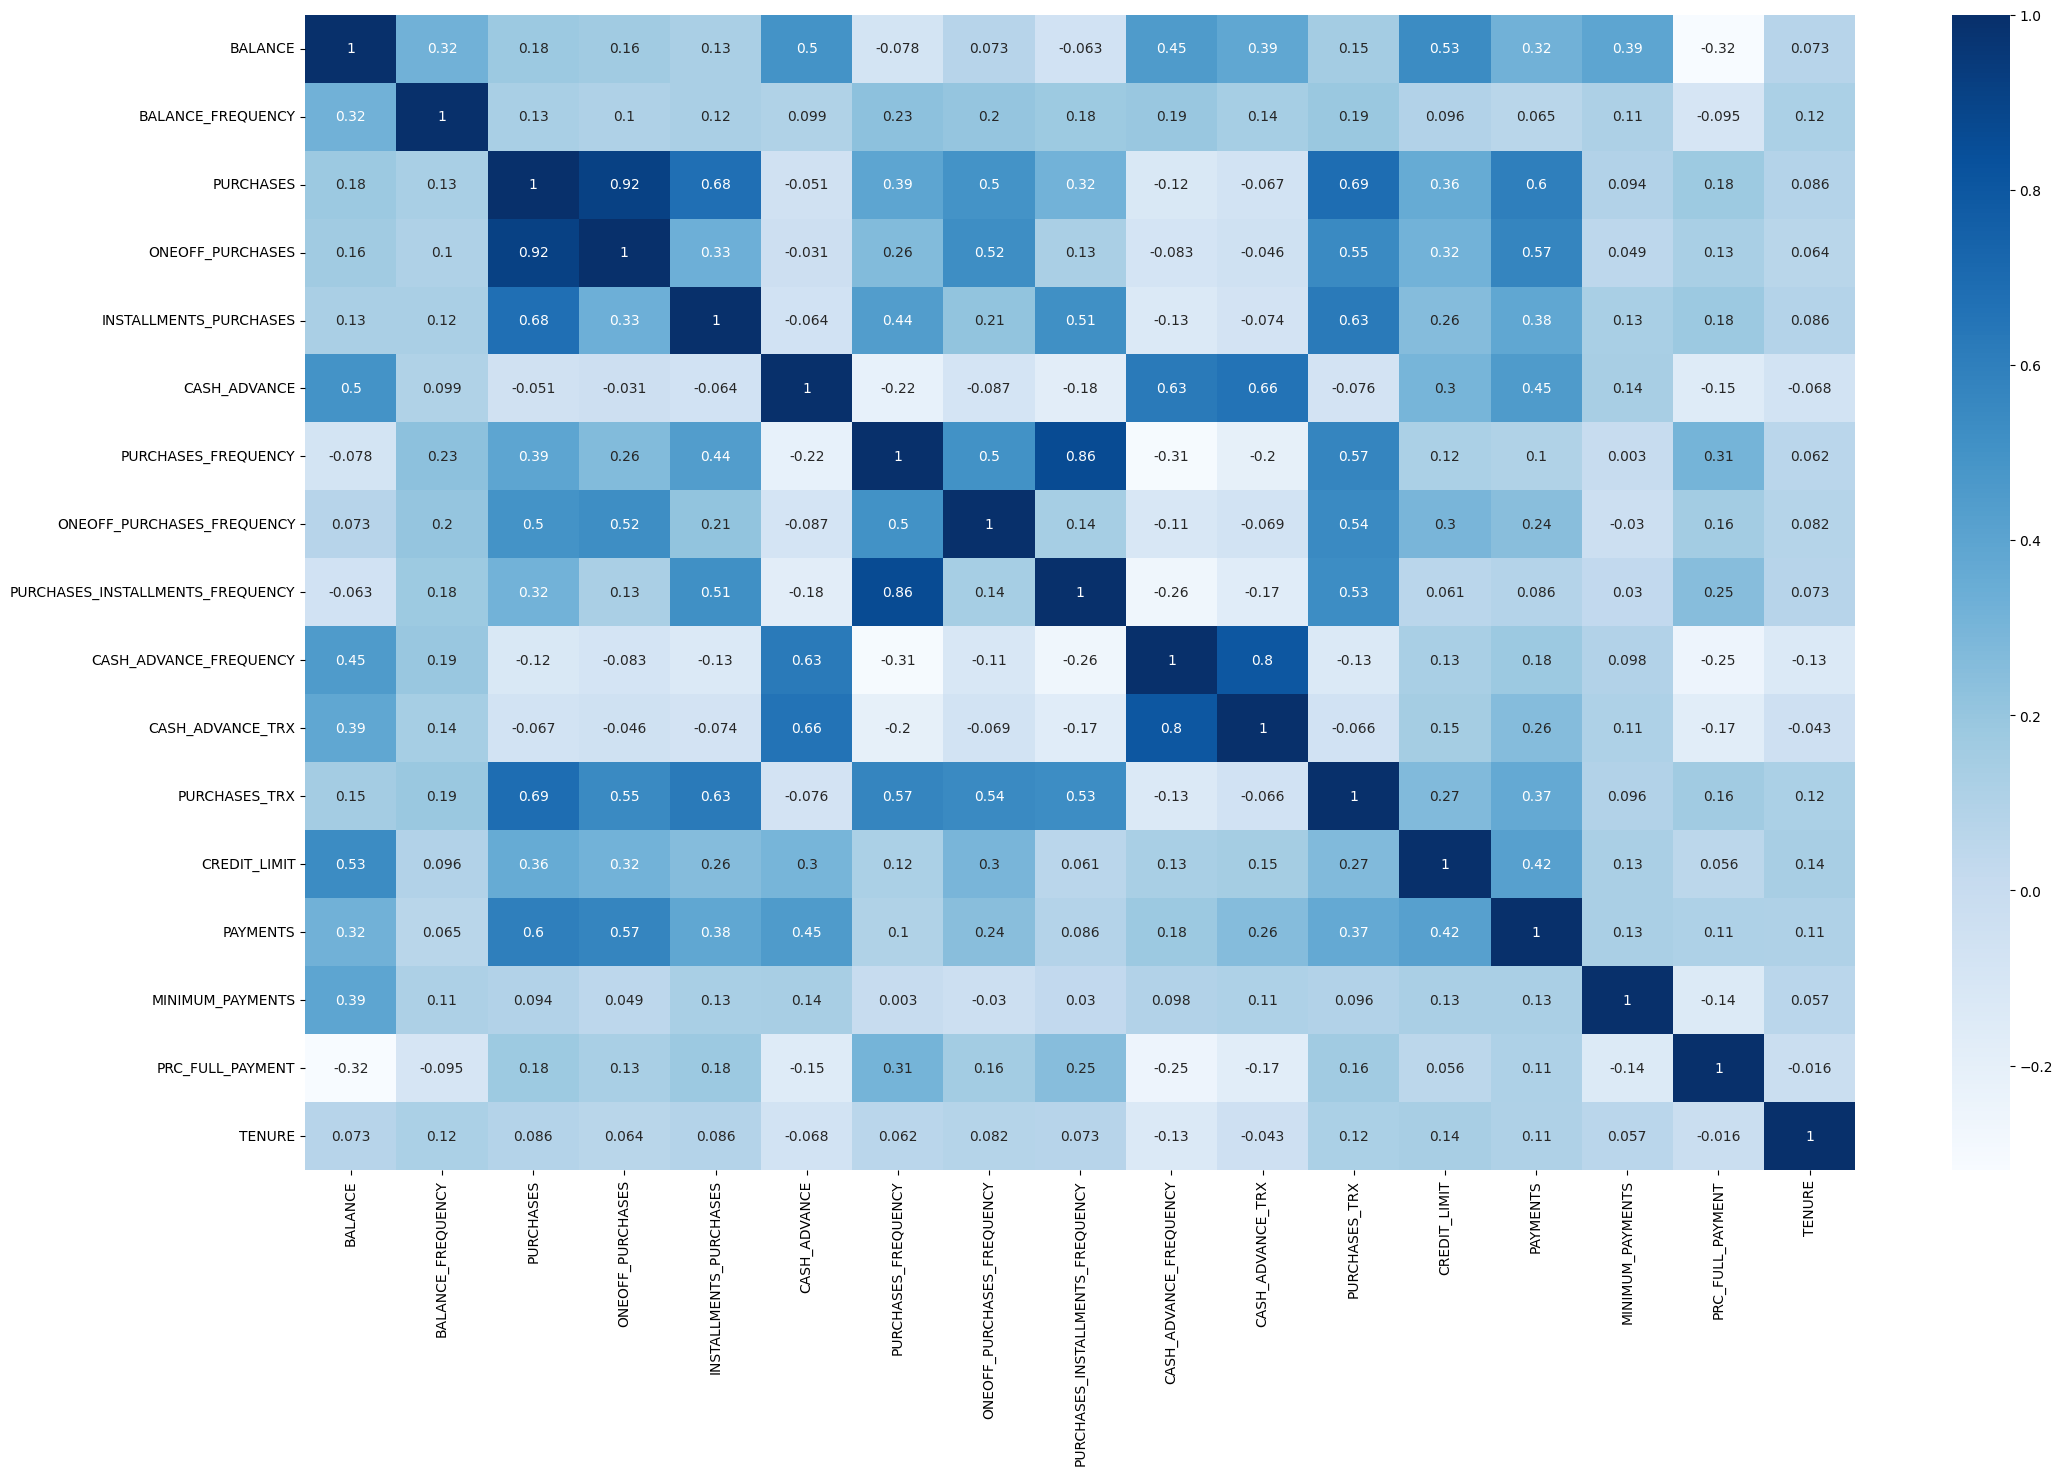

In [102]:
plt.figure(figsize=(25,15))
sns.heatmap( df.corr(), annot=True, cmap='Blues')

In [103]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Data Preprocessing

Menghilangkan outlier yang ekstrem

In [104]:
# Outliers
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [105]:
# Plot outliers

def plot_boxplot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,24))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 12,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

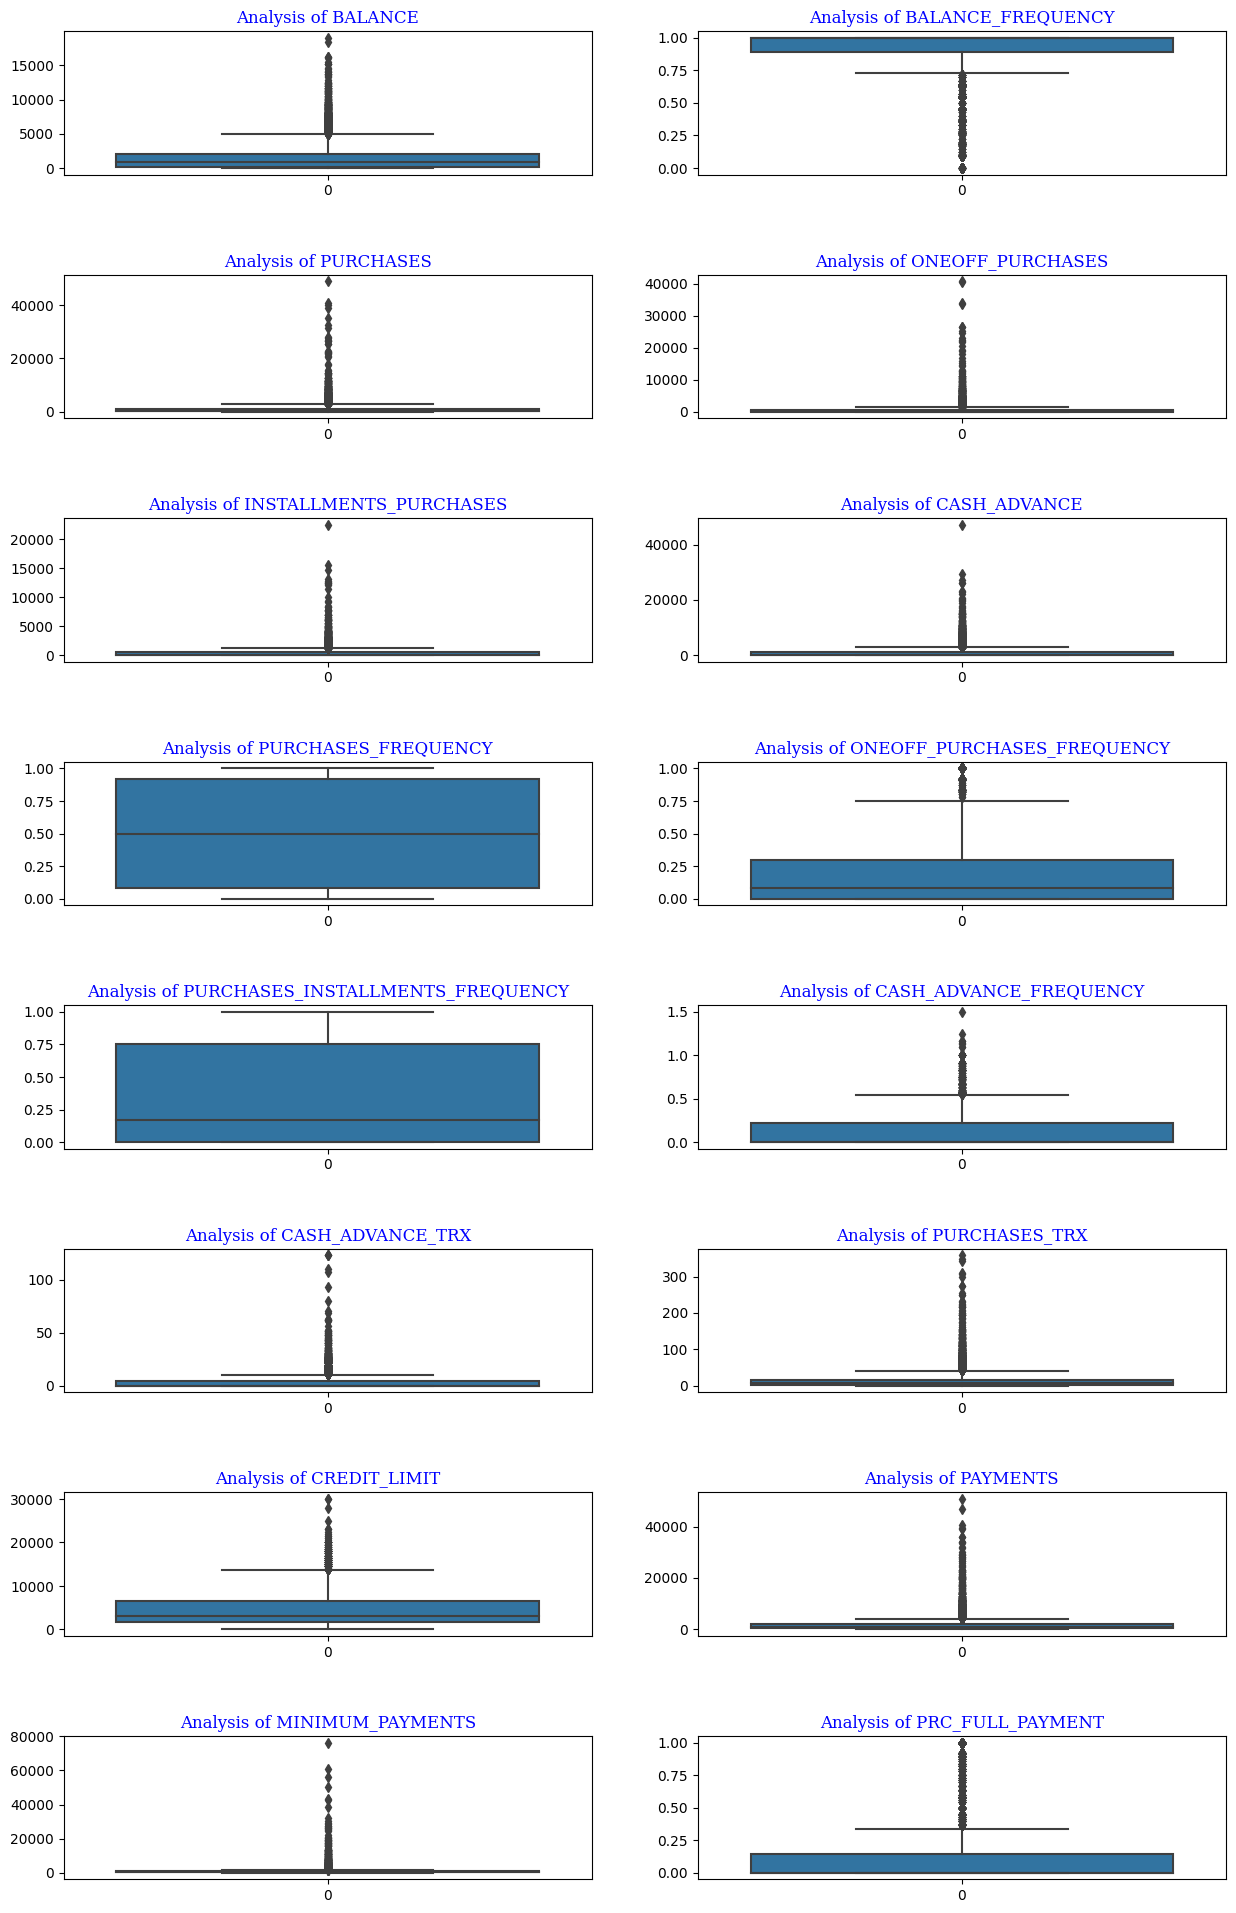

In [106]:
plot_boxplot(df, continuous_features)

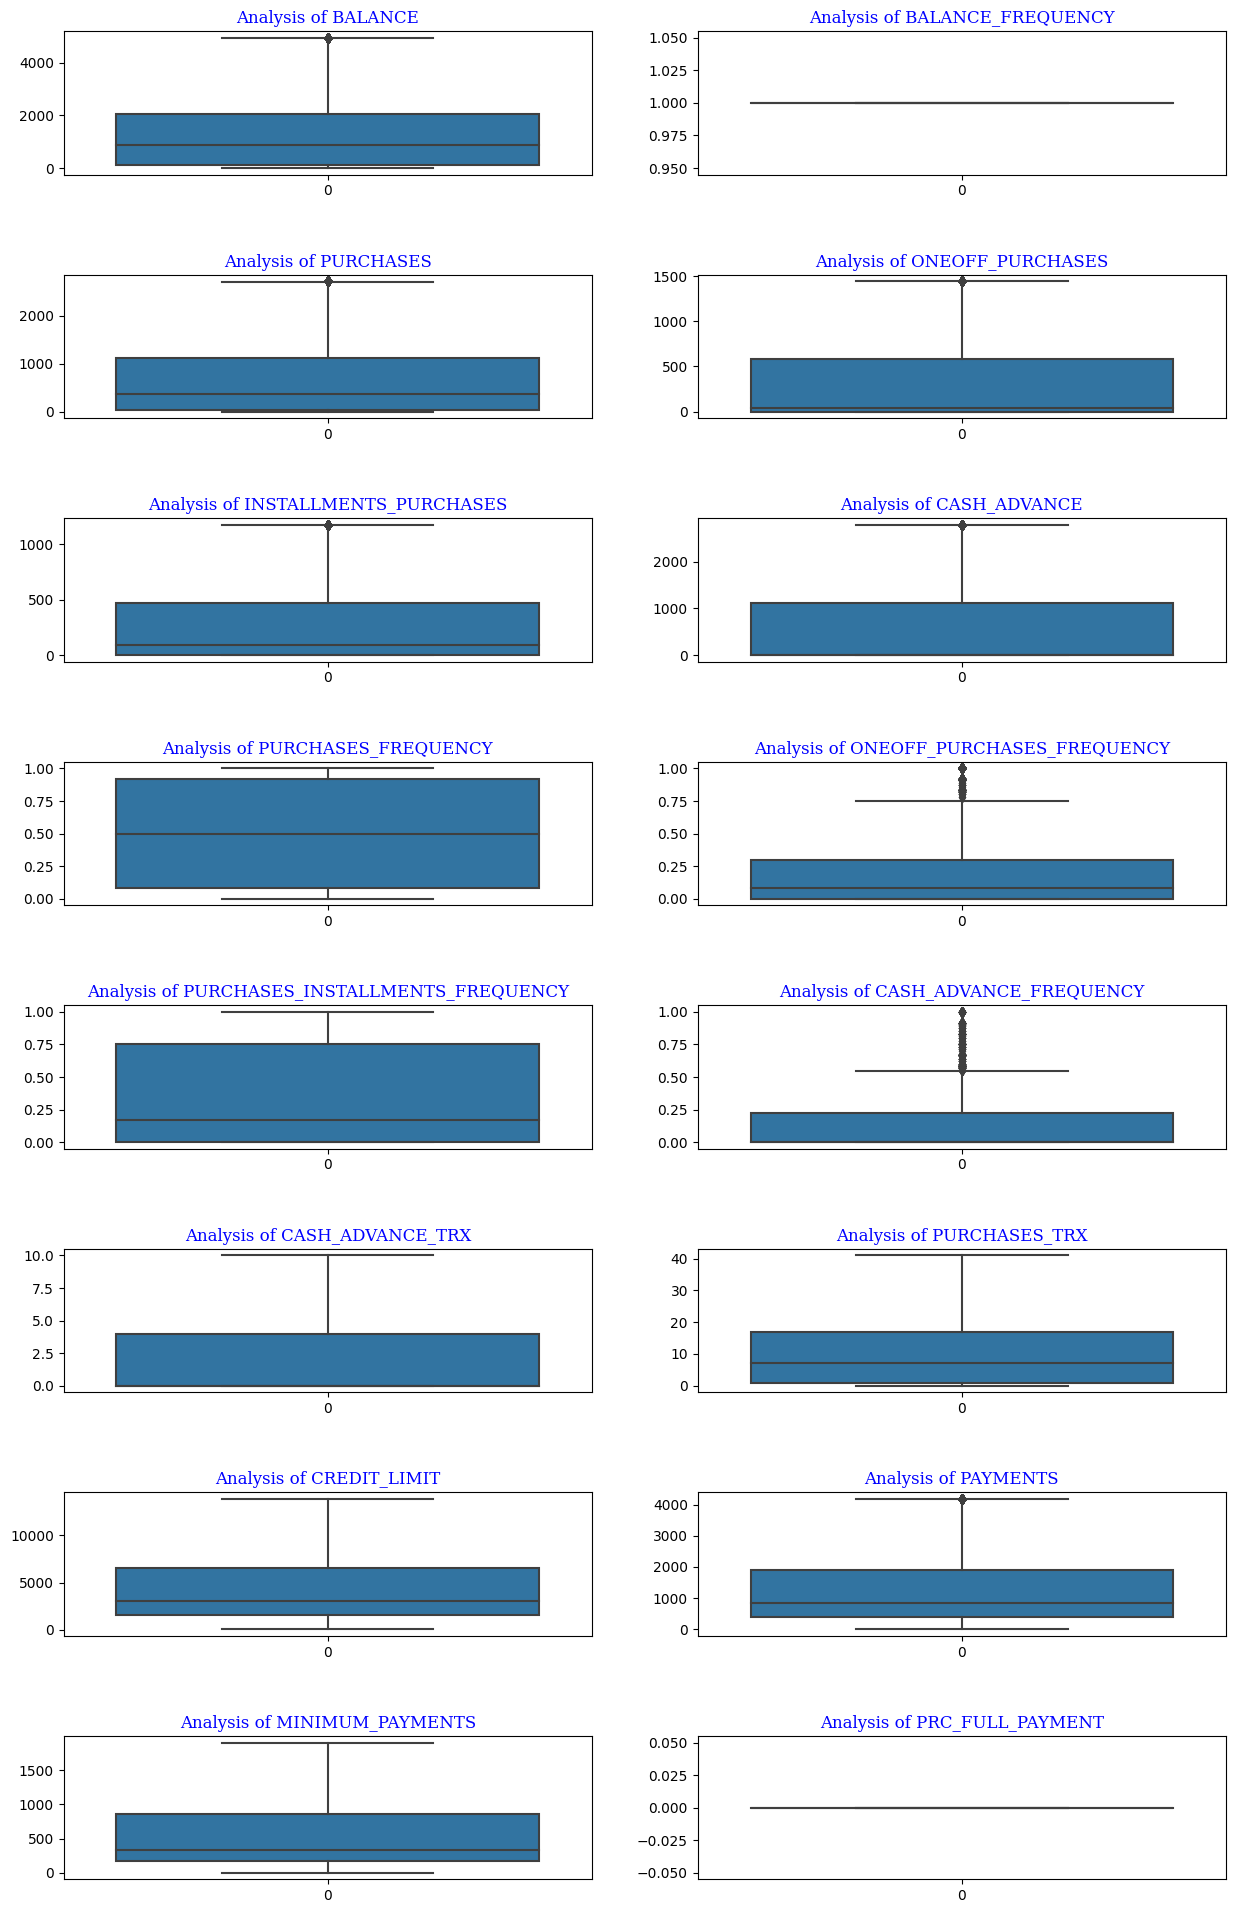

In [107]:
# Remove outliers

def remove_outliers(df,outliers_features):
    # create copy of dataframe

    data = df.copy()

    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
#         data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

df = remove_outliers(df,outliers_features)
plot_boxplot(df, continuous_features)

In [108]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [109]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [110]:
data_scaled.shape

(8950, 17)

PCA

Penggunaan PCA (Principan Component Analysis) digunakan untuk mereduksi dimensi data sehingga dapat mempercepat waktu pelatihan dan pengujian algoritma machine lerarning

In [111]:
# Melakukan PCA dengan 2 komponen
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Membuat dataframe hasil PCA
dfn_principal = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])

# Menampilkan hasil
print(dfn_principal.head())

        PC1       PC2
0 -1.527282 -2.282559
1 -2.228809  2.680803
2  1.397003  0.030135
3 -0.222823  0.111545
4 -1.675806 -1.836524


Visualisasi hasil PCA terlihat dalam gambar dibawah ini

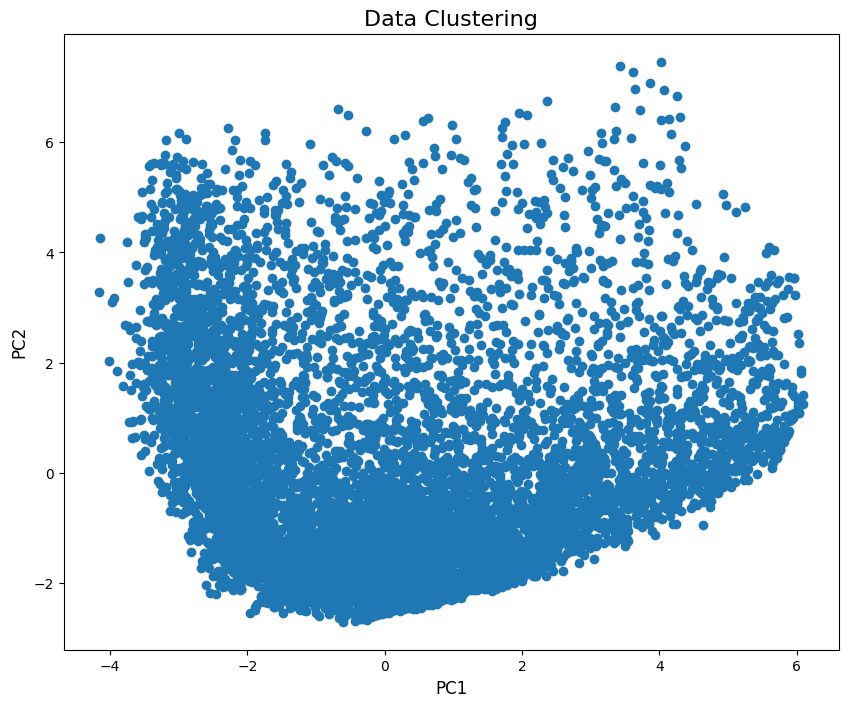

In [112]:
fig, ax = plt.subplots(figsize=(10, 8))

# Menggunakan kolom 'PC1' dan 'PC2' dari dataframe hasil PCA
x = dfn_principal['PC1']
y = dfn_principal['PC2']

ax.scatter(x, y)

ax.set_title('Data Clustering', fontsize=16)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)

plt.show()

# Pendefinisian Model

In [113]:
kmeans=KMeans().fit(df)

# Pelatihan Model

Mencari jumlah minimal kelas dengan elbow method

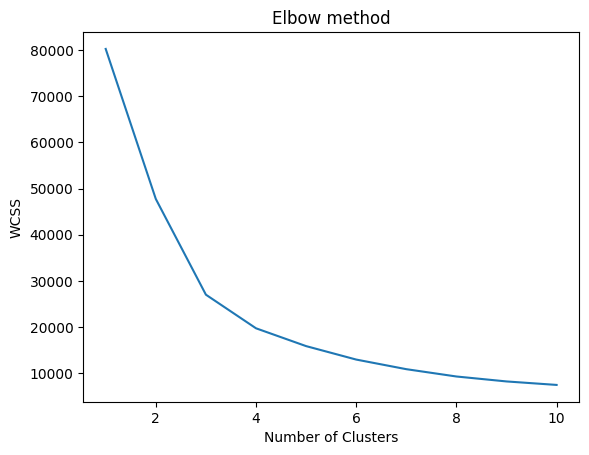

In [114]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

    kmeans.fit(dfn_principal)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Menentukan jumlah cluster menggunakan silhouette


For n_clusters = 2 
The average silhouette_score is: 0.41213721346185306

For n_clusters = 3 
The average silhouette_score is: 0.45223438997367266

For n_clusters = 4 
The average silhouette_score is: 0.4067448563225393

For n_clusters = 5 
The average silhouette_score is: 0.40972507127019564

For n_clusters = 6 
The average silhouette_score is: 0.3920245170998674

For n_clusters = 7 
The average silhouette_score is: 0.37941709752733765

For n_clusters = 8 
The average silhouette_score is: 0.39690767745030064

For n_clusters = 9 
The average silhouette_score is: 0.3776877592180468


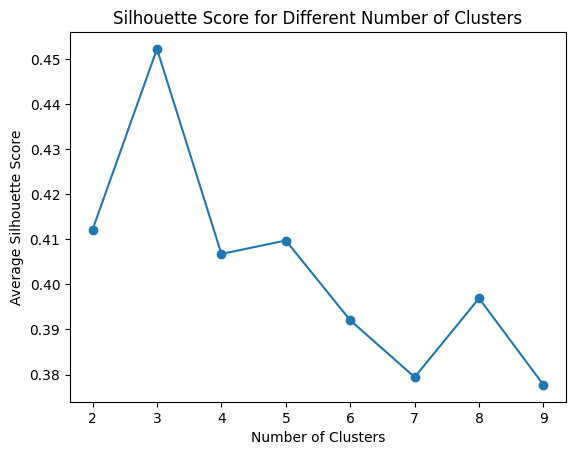

In [115]:
import matplotlib.pyplot as plt

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_scores = []

for n_cluster in n_clusters:
    clusterer = KMeans(n_clusters=n_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(dfn_principal)
    silhouette_avg = silhouette_score(dfn_principal, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("\nFor n_clusters =", n_cluster, "\nThe average silhouette_score is:", silhouette_avg)

# Plotting the silhouette scores
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()


Jumlah cluster terbaik yang menghasilkan skor tertinggi berdasarkan silhouette adalah jumlah cluster 3

In [116]:
!pip install kneed

In [117]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [118]:
features, true_labels = make_blobs(
    n_samples=200, centers=3, cluster_std=2.75, random_state=42)

In [119]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [120]:
kmeans.fit(dfn_principal)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [121]:
# The lowest SSE value
kmeans.inertia_

27024.719087524463

In [122]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.53029206, -1.32584214],
       [ 3.30649622,  0.81230833],
       [-2.07053792,  2.2491768 ]])

In [123]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [124]:
kmeans.labels_[:5]

array([0, 2, 1, 0, 0], dtype=int32)

In [125]:
# k means using 2 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(dfn_principal)
pred = kmeans.predict(dfn_principal)
pred

array([1, 0, 2, ..., 1, 1, 1], dtype=int32)

In [126]:
frame = pd.DataFrame(dfn_principal)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    4797
0    2089
2    2064
Name: cluster, dtype: int64

Jumlah clustering ada 3 claster dengan masing-masing cluster terdiri dari 4788 titik yang masuk cluster 3 (indeks 2), 2084 titik masuk cluster 1 (indeks 0), dan 2076 titik yang masuk cluster 2 (indeks 1)

In [127]:
#create plot model clustering function
def plot_model_clustering(model, dfn_principal):
  plt.figure(figsize=(15,7))
  model.fit(dfn_principal)
  labels= model.labels_
  df_label=dfn_principal.copy()
  df_label['labels']= labels
  ax = sns.scatterplot(x='PC1', y='PC2', hue='labels', data=df_label, palette='bright')
  for index in range(len(str(model))):
    if str(model)[index] == '(':
      ind = index
  ax.set_title(str(model)[:ind])

  silhouette = silhouette_score(dfn_principal, labels)
  print("Silhouette Score:", silhouette)


Silhouette Score: 0.47870481779945007


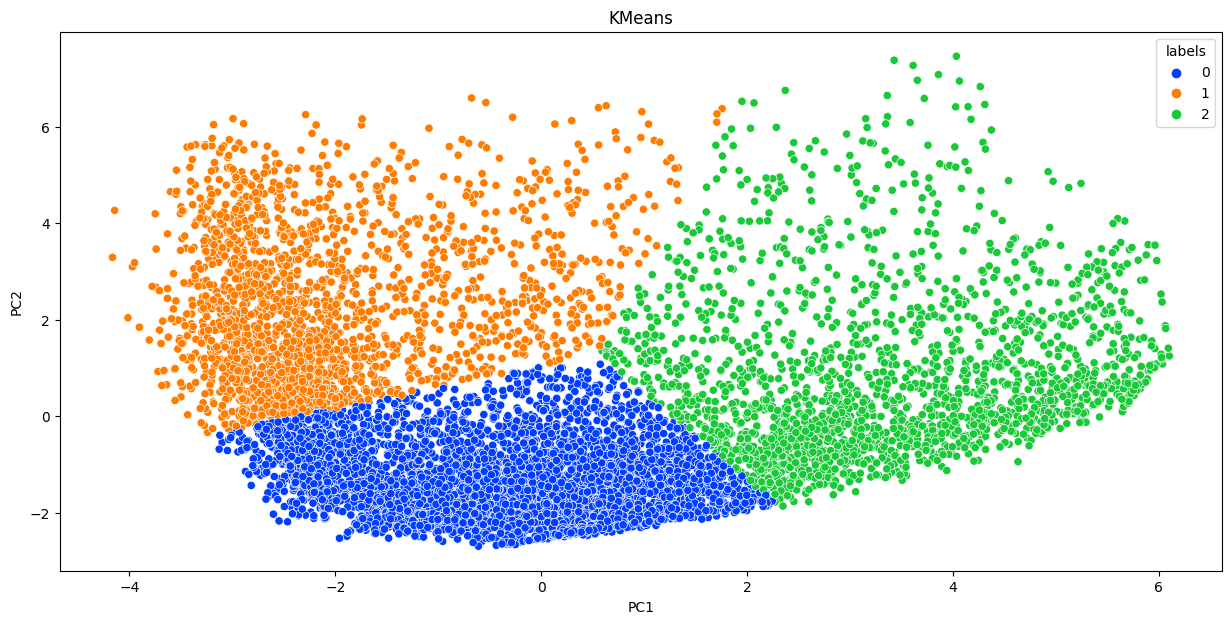

In [128]:
plot_model_clustering(kmeans, dfn_principal)

# Model 2: DBSCAN

In [129]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [132]:
kmeans_silhouette

0.452

In [133]:
dbscan_silhouette

0.38

In [130]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [131]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(3)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (3)

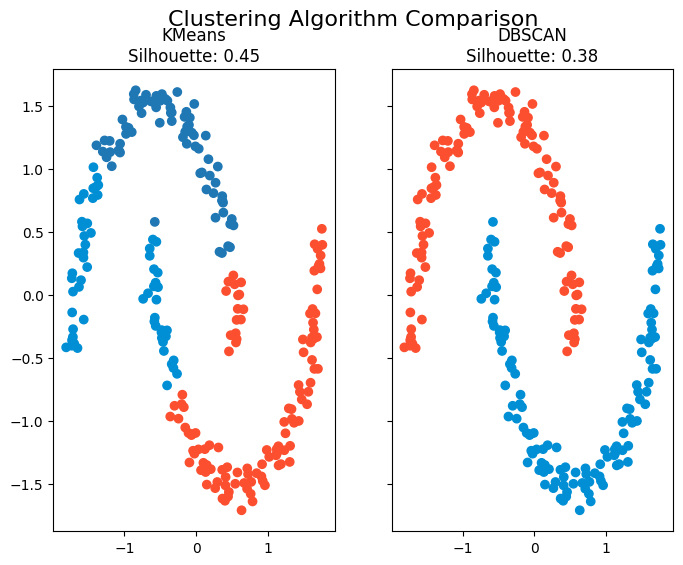

In [139]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)

# Define colors for each cluster
cluster_colors = ['#008fd5', '#fc4f30', '#1f77b4']

# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=16)

# The k-means plot
km_colors = [cluster_colors[label] for label in kmeans_labels]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"KMeans\nSilhouette: {kmeans_silhouette:.2f}", fontdict={"fontsize": 12})

# The DBSCAN plot
db_colors = [cluster_colors[label] for label in dbscan_labels]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette:.2f}", fontdict={"fontsize": 12})

plt.show()

Algoritma clustering menggunakan algoritma KMeans menghasilkan sillhouette score 0,45 sedangkan DBSCAN menghasilkan sillhouette score 0,38. Berdasarkan visualisasi di atas, algortima DBSCAN memiliki kualitas yang lebih baik karena keterpisahan semua objek

# Evaluasi Model

In [135]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [136]:
round(ari_kmeans, 2)

0.38

In [137]:
round(ari_dbscan, 2)

1.0

# Model Inference
Mencoba model ke data baru

In [141]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [142]:
import pandas as pd
dfm=pd.read_csv('Mall_Customers.csv')
dfm.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [144]:
dfm=dfm.drop(['CustomerID'], axis=1)

In [146]:
# Melakukan one-hot encoding pada kolom "Genre"
dfm_encoded = pd.get_dummies(dfm, columns=["Genre"])

# Menampilkan DataFrame setelah encoding
print(dfm_encoded.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  Genre_Male
0   19                  15                      39             0           1
1   21                  15                      81             0           1
2   20                  16                       6             1           0
3   23                  16                      77             1           0
4   31                  17                      40             1           0


In [147]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++',random_state=42)
    k_means.fit(dfm_encoded)
    wcss.append(k_means.inertia_)

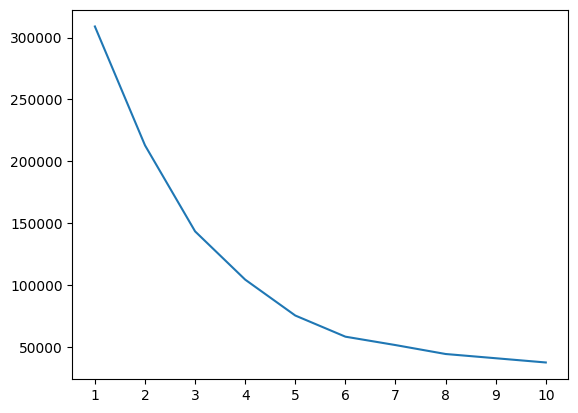

In [148]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));

Cluster yang optimal adalah 5

In [151]:
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=42)
ykmeans = kmeans.fit_predict(dfm_encoded)

In [152]:
ykmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

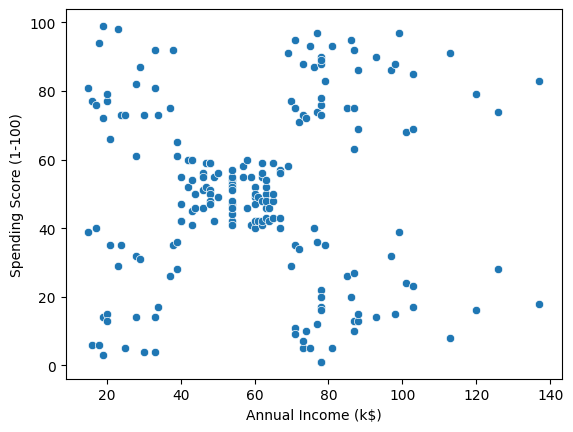

In [156]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dfm_encoded, palette=['red','green','blue','black','brown'])

In [161]:
kmeans_silhouette

0.4517938857863906

# Pengambilan Kesimpulan

- Model K-Means menghasilkan silhouette score 0.49 artinya objek dalam cluster tersebut memiliki tingkat keterpisahan yang relatif baik dengan objek di cluster lainnya.
- Ketika dibandingkan dengan algortima clustering lainnya yaitu DBSCAN, kualitas model menggunakan algortima KMenas memiliki kualitas yang kurang dibandingkan DBSCAN. Nilai adjusted rand score untuk algortitma KMeans memiliki nilai 0,38 yang menunjukkan bahwa tingkat keterpisan kurang baik jika dibandingkan dengan nilai adjusted rand score pada model DBSCAN yang memiliki nilai 1 yanag menunjukkan bahwa model DBSCAN mampu mengidentifikasi cluster dengan sempurna dan mengelompokkan objek dengan benar sesuai dengan pengelompokan yang seharusnya.
- Penerapan model menggunakan algoritma KMeans pada data lain menghasilkan sillhouette 0,45 yang menunjjukkan tingkat keterpisahan yang relatif baik.